In [54]:
import networkx as nx
import seaborn as sns


array([[ 0.,  1., inf, ..., inf, inf, inf],
       [inf,  0., inf, ..., inf, inf, inf],
       [inf, inf,  0., ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ...,  0., inf, inf],
       [inf, inf, inf, ..., inf,  0., inf],
       [inf, inf, inf, ..., inf, inf,  0.]])

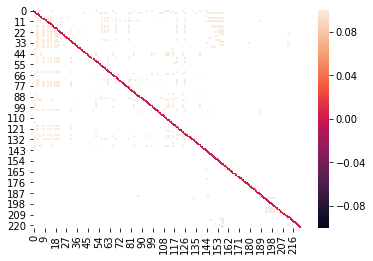

In [71]:
from os.path import join, abspath, dirname

path = join('.', '..', 'tests/out/graph.gexf')
G = nx.read_gexf(path)

nodelist = list(G.nodes())
matrix = np.array(nx.floyd_warshall_numpy(G, nodelist=nodelist, weight='weight'))
sns.heatmap(matrix)
matrix

In [56]:
import numpy as np

cycles = []
for i, _ in enumerate(matrix):
    for j, _ in enumerate(matrix):
        a = matrix[i,j]
        b = matrix[j,i]
        if i == j:
            continue
        if a != np.inf and b != np.inf:
            anode = nodelist[i]
            bnode = nodelist[j]
            cycles.append((anode, bnode, a, b, a + b))
cycles = sorted(cycles, key=lambda c: c[-1])
len(cycles)

0

In [74]:
set(np.array(matrix).flatten())

{0.0, 1.0, 10.0, inf}

from more_itertools import pairwise

for c in cycles[:10]:
    path1 = nx.shortest_path(G, c[0], c[1])
    path2 = nx.shortest_path(G, c[1], c[0])
    path = path1 + path2[1:]
    for n1, n2 in pairwise(path):
        print(n1)
        print(n2)
        print(G[n1][n2])
    print()